# Определение возраста покупателей

Сетевой супермаркет «Хлеб-Соль» внедряет систему компьютерного зрения для обработки фотографий покупателей. Фотофиксация в прикассовой зоне поможет определять возраст клиентов, чтобы:
Анализировать покупки и предлагать товары, которые могут заинтересовать покупателей этой возрастной группы;
Контролировать добросовестность кассиров при продаже алкоголя.
Постройте модель, которая по фотографии определит приблизительный возраст человека. В вашем распоряжении набор фотографий людей с указанием возраста.

## Исследовательский анализ данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [2]:
try:
    labels = pd.read_csv('labels.csv')
except:
    print('file opening error')

In [3]:
train_datagen = ImageDataGenerator(rescale=1./225)

In [4]:
train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory='/datasets/faces/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        seed=12345)

Found 7591 validated image filenames.


In [5]:
labels.shape

(7591, 2)

In [6]:
labels.describe()

,real_age
count,7591.000000
mean,31.201159
std,17.145060
min,1.000000
25%,20.000000
50%,29.000000
75%,41.000000
max,100.000000




 -------------------------------------------------------------------------------- 
Гистограмма зависимости реального возраста от частоты, с которой он встречается
 --------------------------------------------------------------------------------


Text(0, 0.5, 'частота')

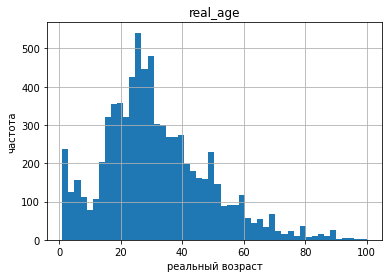

In [46]:
print('\n\n','-'*80, "\nГистограмма зависимости реального возраста от частоты, с которой он встречается\n",'-'*80)
labels.hist(bins=50)
plt.xlabel('реальный возраст')
plt.ylabel('частота')
    

In [9]:
features, target = next(train_gen_flow)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

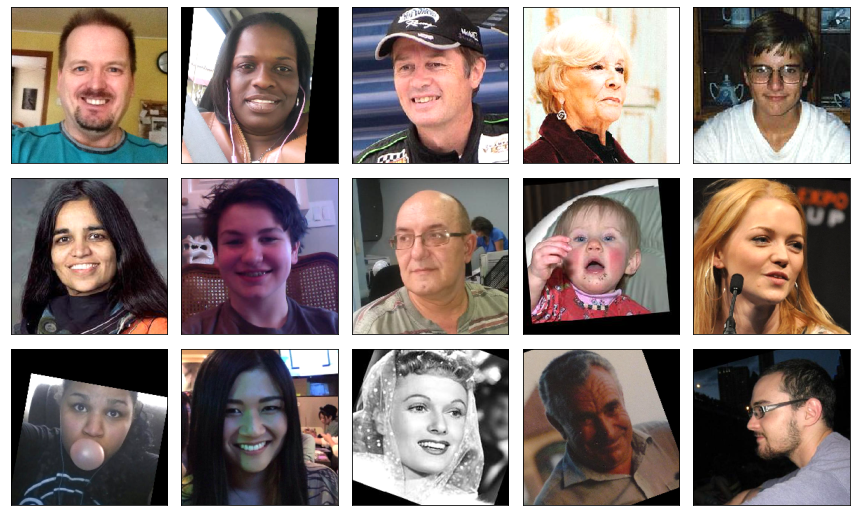

In [10]:
pictur = plt.figure(figsize=(12,12))
for i in range(15):
    pictur.add_subplot(5, 5, i+1)
    plt.imshow(features[i])
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()

**Датасет состоит из 7591 картинок лиц людей разного возраста и пола. Максимальное количество фотографий людей 25-35 лет. Есть фотографии, расположенные под углом**

## Обучение модели

Перенесите сюда код обучения модели и её результат вывода на экран.


(Код в этом разделе запускается в отдельном GPU-тренажёре, поэтому оформлен не как ячейка с кодом, а как код в текстовой ячейке)

```python

# < скопируйте код сюда >

```
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np
import pandas as pd
import tensorflow as tf


def load_train(path):
    labels = pd.read_csv(path + 'labels.csv')
    datagen = ImageDataGenerator(validation_split=0.25, horizontal_flip=True, vertical_flip=True,rescale=1/255.)
    train_gen_flow = datagen.flow_from_dataframe(
        dataframe=labels,
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=16,
        class_mode='raw',
        subset='training',
        seed=12345)

    return train_gen_flow

def load_test(path):
    labels = pd.read_csv(path + 'labels.csv')
    datagen = ImageDataGenerator(validation_split=0.25, rescale=1./255)
    test_gen_flow = datagen.flow_from_dataframe(
        dataframe=labels,
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=16,
        class_mode='raw',
        subset='validation',
        seed=12345)

    return test_gen_flow


def create_model(input_shape):

    backbone = ResNet50(input_shape=input_shape,
                    weights='imagenet', 
                    include_top=False)
    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1, activation='relu'))

    optimizer = Adam(lr=0.0003)
    model.compile(optimizer=optimizer, loss='mean_squared_error',
                  metrics=['mae'])


    return model


def train_model(model, train_data, test_data, batch_size=None, epochs=10,
                steps_per_epoch=None, validation_steps=None):

    if steps_per_epoch is None:
        steps_per_epoch = len(train_data)
    if validation_steps is None:
        validation_steps = len(test_data)

    model.fit(train_data,
              validation_data=test_data,
              batch_size=batch_size, 
              epochs=epochs,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2)

    return model

```

# < скопируйте результат вывода на экран сюда >
# < длинные строки со скачиванием модели можно удалить >

```
2023-08-17 14:08:26.149071: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libnvinfer.so.6
2023-08-17 14:08:26.150934: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libnvinfer_plugin.so.6
2023-08-17 14:08:27.013967: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2023-08-17 14:08:27.023840: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1555] Found device 0 with properties: 
pciBusID: 0000:8b:00.0 name: Tesla V100-SXM2-32GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 31.75GiB deviceMemoryBandwidth: 836.37GiB/s
2023-08-17 14:08:27.023911: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2023-08-17 14:08:27.023944: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2023-08-17 14:08:27.025990: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10
2023-08-17 14:08:27.026403: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand.so.10
2023-08-17 14:08:27.029066: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusolver.so.10
2023-08-17 14:08:27.030309: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusparse.so.10
2023-08-17 14:08:27.030370: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
2023-08-17 14:08:27.034407: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1697] Adding visible gpu devices: 0
Using TensorFlow backend.
Found 5694 validated image filenames.
Found 1897 validated image filenames.
2023-08-17 14:08:27.205266: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 AVX512F FMA
2023-08-17 14:08:27.211566: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2099995000 Hz
2023-08-17 14:08:27.212169: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x56c0cb0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2023-08-17 14:08:27.212197: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2023-08-17 14:08:27.367748: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x4d20fd0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-08-17 14:08:27.367786: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Tesla V100-SXM2-32GB, Compute Capability 7.0
2023-08-17 14:08:27.369840: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1555] Found device 0 with properties: 
pciBusID: 0000:8b:00.0 name: Tesla V100-SXM2-32GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 31.75GiB deviceMemoryBandwidth: 836.37GiB/s
2023-08-17 14:08:27.369895: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2023-08-17 14:08:27.369905: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2023-08-17 14:08:27.369928: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10
2023-08-17 14:08:27.369937: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand.so.10
2023-08-17 14:08:27.369947: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusolver.so.10
2023-08-17 14:08:27.369956: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusparse.so.10
2023-08-17 14:08:27.369964: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
2023-08-17 14:08:27.373735: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1697] Adding visible gpu devices: 0
2023-08-17 14:08:27.373795: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2023-08-17 14:08:27.728787: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1096] Device interconnect StreamExecutor with strength 1 edge matrix:
2023-08-17 14:08:27.728837: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1102]      0 
2023-08-17 14:08:27.728845: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] 0:   N 
2023-08-17 14:08:27.732631: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
2023-08-17 14:08:27.732682: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1241] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 10240 MB memory) -> physical GPU (device: 0, name: Tesla V100-SXM2-32GB, pci bus id: 0000:8b:00.0, compute capability: 7.0)
Downloading data from https://github.com/keras-team/keras-applications/releases/download/resnet/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5

   49152/947
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
Train for 356 steps, validate for 119 steps
Epoch 1/10
2023-08-17 14:08:42.509991: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2023-08-17 14:08:42.837701: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
356/356 - 61s - loss: 216.0716 - mae: 11.1347 - val_loss: 668.6867 - val_mae: 20.9073
Epoch 2/10
356/356 - 49s - loss: 143.3586 - mae: 9.1401 - val_loss: 265.7183 - val_mae: 12.2798
Epoch 3/10
356/356 - 44s - loss: 125.5542 - mae: 8.5175 - val_loss: 123.4933 - val_mae: 8.5429
Epoch 4/10
356/356 - 47s - loss: 113.1067 - mae: 8.1383 - val_loss: 159.5457 - val_mae: 9.1062
Epoch 5/10
356/356 - 50s - loss: 100.6508 - mae: 7.6362 - val_loss: 109.8203 - val_mae: 8.3581
Epoch 6/10
356/356 - 50s - loss: 88.4154 - mae: 7.1402 - val_loss: 139.0784 - val_mae: 9.2802
Epoch 7/10
356/356 - 42s - loss: 81.6332 - mae: 6.8864 - val_loss: 103.2876 - val_mae: 7.6612
Epoch 8/10
356/356 - 50s - loss: 67.9791 - mae: 6.3565 - val_loss: 121.8348 - val_mae: 8.2825
Epoch 9/10
356/356 - 50s - loss: 68.1926 - mae: 6.2984 - val_loss: 120.0903 - val_mae: 8.0041
Epoch 10/10
356/356 - 43s - loss: 60.9726 - mae: 5.9696 - val_loss: 111.6684 - val_mae: 7.7457
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
119/119 - 10s - loss: 111.6684 - mae: 7.7457
Test MAE: 7.7457
2023-08-17 14:08:26.149071: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libnvinfer.so.6
2023-08-17 14:08:26.150934: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libnvinfer_plugin.so.6
2023-08-17 14:08:27.013967: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2023-08-17 14:08:27.023840: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1555] Found device 0 with properties: 
pciBusID: 0000:8b:00.0 name: Tesla V100-SXM2-32GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 31.75GiB deviceMemoryBandwidth: 836.37GiB/s
2023-08-17 14:08:27.023911: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2023-08-17 14:08:27.023944: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2023-08-17 14:08:27.025990: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10
2023-08-17 14:08:27.026403: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand.so.10
2023-08-17 14:08:27.029066: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusolver.so.10
2023-08-17 14:08:27.030309: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusparse.so.10
2023-08-17 14:08:27.030370: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
2023-08-17 14:08:27.034407: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1697] Adding visible gpu devices: 0
Using TensorFlow backend.
Found 5694 validated image filenames.
Found 1897 validated image filenames.
2023-08-17 14:08:27.205266: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 AVX512F FMA
2023-08-17 14:08:27.211566: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2099995000 Hz
2023-08-17 14:08:27.212169: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x56c0cb0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2023-08-17 14:08:27.212197: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2023-08-17 14:08:27.367748: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x4d20fd0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-08-17 14:08:27.367786: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Tesla V100-SXM2-32GB, Compute Capability 7.0
2023-08-17 14:08:27.369840: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1555] Found device 0 with properties: 
pciBusID: 0000:8b:00.0 name: Tesla V100-SXM2-32GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 31.75GiB deviceMemoryBandwidth: 836.37GiB/s
2023-08-17 14:08:27.369895: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2023-08-17 14:08:27.369905: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2023-08-17 14:08:27.369928: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10
2023-08-17 14:08:27.369937: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand.so.10
2023-08-17 14:08:27.369947: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusolver.so.10
2023-08-17 14:08:27.369956: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusparse.so.10
2023-08-17 14:08:27.369964: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
2023-08-17 14:08:27.373735: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1697] Adding visible gpu devices: 0
2023-08-17 14:08:27.373795: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2023-08-17 14:08:27.728787: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1096] Device interconnect StreamExecutor with strength 1 edge matrix:
2023-08-17 14:08:27.728837: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1102]      0 
2023-08-17 14:08:27.728845: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] 0:   N 
2023-08-17 14:08:27.732631: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
2023-08-17 14:08:27.732682: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1241] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 10240 MB memory) -> physical GPU (device: 0, name: Tesla V100-SXM2-32GB, pci bus id: 0000:8b:00.0, compute capability: 7.0)
Downloading data from https://github.com/keras-team/keras-applications/releases/download/resnet/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5



<class 'tensorflow.python.keras.engine.sequential.Sequential'>
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
Train for 356 steps, validate for 119 steps
Epoch 1/10
2023-08-17 14:08:42.509991: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2023-08-17 14:08:42.837701: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
356/356 - 61s - loss: 216.0716 - mae: 11.1347 - val_loss: 668.6867 - val_mae: 20.9073
Epoch 2/10
356/356 - 49s - loss: 143.3586 - mae: 9.1401 - val_loss: 265.7183 - val_mae: 12.2798
Epoch 3/10
356/356 - 44s - loss: 125.5542 - mae: 8.5175 - val_loss: 123.4933 - val_mae: 8.5429
Epoch 4/10
356/356 - 47s - loss: 113.1067 - mae: 8.1383 - val_loss: 159.5457 - val_mae: 9.1062
Epoch 5/10
356/356 - 50s - loss: 100.6508 - mae: 7.6362 - val_loss: 109.8203 - val_mae: 8.3581
Epoch 6/10
356/356 - 50s - loss: 88.4154 - mae: 7.1402 - val_loss: 139.0784 - val_mae: 9.2802
Epoch 7/10
356/356 - 42s - loss: 81.6332 - mae: 6.8864 - val_loss: 103.2876 - val_mae: 7.6612
Epoch 8/10
356/356 - 50s - loss: 67.9791 - mae: 6.3565 - val_loss: 121.8348 - val_mae: 8.2825
Epoch 9/10
356/356 - 50s - loss: 68.1926 - mae: 6.2984 - val_loss: 120.0903 - val_mae: 8.0041
Epoch 10/10
356/356 - 43s - loss: 60.9726 - mae: 5.9696 - val_loss: 111.6684 - val_mae: 7.7457
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
119/119 - 10s - loss: 111.6684 - mae: 7.7457
Test MAE: 7.7457




## Анализ обученной модели

Напишите выводы здесь

В проекте была использована сверточная нейронная сеть, построенная поверх ResNet50. Для оценки качества была использована МАЕ, для аугментации - вертикальное и горизонтальное переворачивание. Валидационная выборка составила 25%, шаг оптимазейра Adam  - 0.0003. Обучение модели происходило на десяти эпохах. МАЕ на валидационной выборке за 10 эпох снизилась с  20.91 до 7.74. По динамике снижения МАЕ можно сказать, что увеличение количества эпох, вероятнее всего, улучшит результат, но для необходимого заданного уровня < 8 достаточно десяти.


**Модель, созданная с использованием GPU и нейронных сетей показала хорошие результаты. Возраст покупателей определяется с погрешностью 7-8 лет. Это неплохо для определения предпочтений по возрастной группе, но мне кажется недостаточным для проверки добросовестности кассиров при продаже алкоголя.**